## Football Salary Prediction Project

In this project, I aim to predict football player salaries using a regression model. The dataset provides detailed contract information for professional football players, including their positions, teams, ages, and various financial metrics, such as total contract value, average yearly salary, and guaranteed amounts. The primary goal is to develop a predictive model that can accurately estimate a player's average yearly salary based on these attributes.

The dataset includes various features:

Player Contract Details: Information about contract values, guarantees, and the player's free agency status.
Player Attributes: Key information such as age, position, and team.

By utilizing this dataset, we hope to gain insights into the factors that most influence football player salaries and improve our regression modeling skills, ultimately developing a model capable of predicting average yearly salaries based on both player and contract characteristics.

## Understanding Regression

Regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. The main purpose of regression analysis is to predict the dependent variable's value based on the independent variables.

### Linear Regression

Linear regression is a form of regression that assumes a direct, linear relationship between the dependent and independent variables. The linear relationship is expressed mathematically as:

[ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon ]

Where:

( y ) is the predicted value (dependent variable)
( \beta_0 ) is the y-intercept
( \beta_1, \beta_2, ..., \beta_n ) are the coefficients for each independent variable ( x_1, x_2, ..., x_n )
( \epsilon ) is the error term

The objective is to find the best-fitting line that minimizes the squared differences between the observed values and the predictions, typically achieved using a technique called Ordinary Least Squares (OLS).


Dataset Preview:
       position          player     team  age  total_value  avg_year  \
0  right-tackle     Trent Brown  Raiders   26     66000000  16500000   
1  right-tackle   Ja’Wuan James  Broncos   27     51000000  12750000   
2  right-tackle    Lane Johnson   Eagles   29     56250000  11250000   
3  right-tackle    Ricky Wagner    Lions   30     47500000   9500000   
4  right-tackle  Rob Havenstein     Rams   26     32500000   8125000   

   total_guaranteed  fully_guaranteed free_agency  
0          36250000          36250000    2023 UFA  
1          32000000          27000000    2023 UFA  
2          35500000          20862242   2022 Void  
3          29500000          17500000    2022 UFA  
4          16226365           9976365    2023 UFA  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5523 entries, 0 to 5522
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   position          55

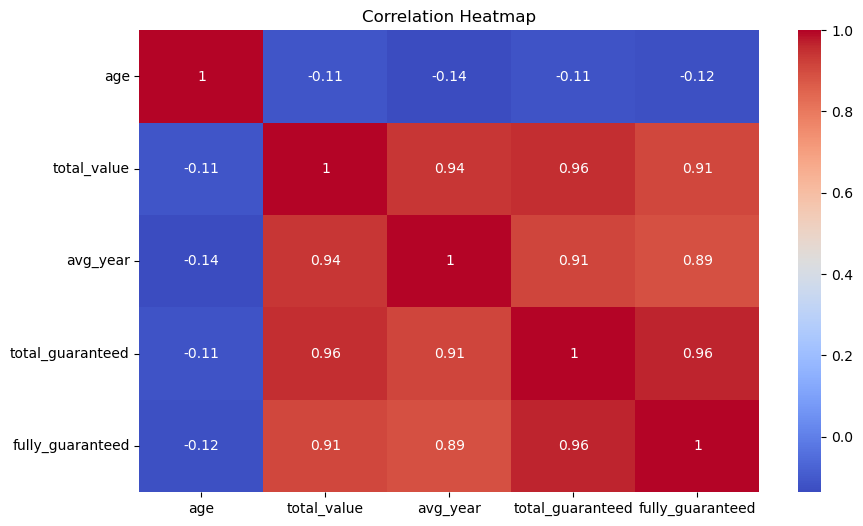

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

file_path = '/Users/devamin/Desktop/3162-Project3/football_salaries.csv'
df = pd.read_csv(file_path)

print("Dataset Preview:")
print(df.head())

print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Experiment 1: Pre-processing

After gaining an understanding of the football_salaries dataset, the next step is to preprocess the data to prepare it for modeling. Below are the key steps taken during this phase:

    1. Handling Null Values:
        Identify columns with missing values, such as free_agency, which has a few missing entries.

    2. Feature Selection:
        Based on initial data analysis and correlation insights, select features that are most relevant for predicting player salaries. For instance, features like age, total_value, total_guaranteed, and fully_guaranteed may be highly indicative of avg_year (average yearly salary).

    3. Feature Transformation:
        Convert categorical variables such as position and team into numerical format using one-hot encoding. This transformation allows these categorical features to be included in the regression model without imposing any ordinal assumptions on them.

    4. Creating New Features
        Consider creating additional features that might enhance the model’s performance. For example, you could create a feature that calculates the ratio of fully_guaranteed to total_guaranteed as an indicator of the guarantee level in the contract, which may correlate with average salary.

    5. Normalizing/Standardizing Data (if necessary):
        Depending on the model type and feature ranges, it may be beneficial to normalize or standardize numerical features like age, total_value, total_guaranteed, and fully_guaranteed.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_path = '/Users/devamin/Desktop/3162-Project3/football_salaries.csv'
data = pd.read_csv(file_path)

# Handling Null Values
data['free_agency'].fillna('Unknown', inplace=True)

# Feature Selection
features = ['age', 'total_value', 'total_guaranteed', 'fully_guaranteed', 'position', 'team']
X = data[features]
y = data['avg_year']

# Feature Transformation
X = pd.get_dummies(X, columns=['position', 'team'], drop_first=True)

# Creating New Features
X['guarantee_ratio'] = X['fully_guaranteed'] / (X['total_guaranteed'] + 1e-5)

# Normalizing/Standardizing Data
scaler = StandardScaler()
numeric_features = ['age', 'total_value', 'total_guaranteed', 'fully_guaranteed', 'guarantee_ratio']
X[numeric_features] = scaler.fit_transform(X[numeric_features])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the preprocessed training data
print("Preprocessed Training Data:")
print(X_train.head())

Preprocessed Training Data:
           age  total_value  total_guaranteed  fully_guaranteed  \
1849 -0.296691    -0.382073         -0.390979         -0.422769   
2815 -0.298512    -0.379118         -0.390774         -0.422496   
957  -0.294870    -0.326110         -0.349859         -0.368140   
1295 -0.298512    -0.330410         -0.383616         -0.412987   
4200 -0.300334    -0.378615         -0.385839         -0.415940   

      position_3-4-defensive-tackle  position_3-4-outside-linebacker  \
1849                          False                            False   
2815                          False                            False   
957                           False                            False   
1295                          False                            False   
4200                          False                            False   

      position_4-3-defensive-end  position_4-3-defensive-tackle  \
1849                       False                          False   
28

/var/folders/fl/fd_w98792vz_5scbbct57yfr0000gn/T/ipykernel_49729/4189464684.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['free_agency'].fillna('Unknown', inplace=True)


## Experiment 1: Modeling

In this experiment, we will create a linear regression model to predict average yearly salaries (avg_year) based on selected features from the football_salaries dataset. The model will be trained on the preprocessed dataset, and its performance will be evaluated using the Root Mean Squared Error (RMSE) metric.

### Steps:

    1. Import Required Libraries: Import necessary libraries for linear regression modeling and evaluation.

    2. Split the Data: Divide the preprocessed dataset into training and testing sets to evaluate the model’s generalization performance.

    3. Create the Linear Regression Model: Fit a linear regression model using the training data to learn the relationship between features and the target variable (avg_year).

    4. Make Predictions: Use the trained model to predict average yearly salaries on the testing set.

    5. Evaluate the Model: Calculate the RMSE on the testing set to assess the accuracy of the model’s predictions.


Root Mean Squared Error (RMSE): 1277632.43


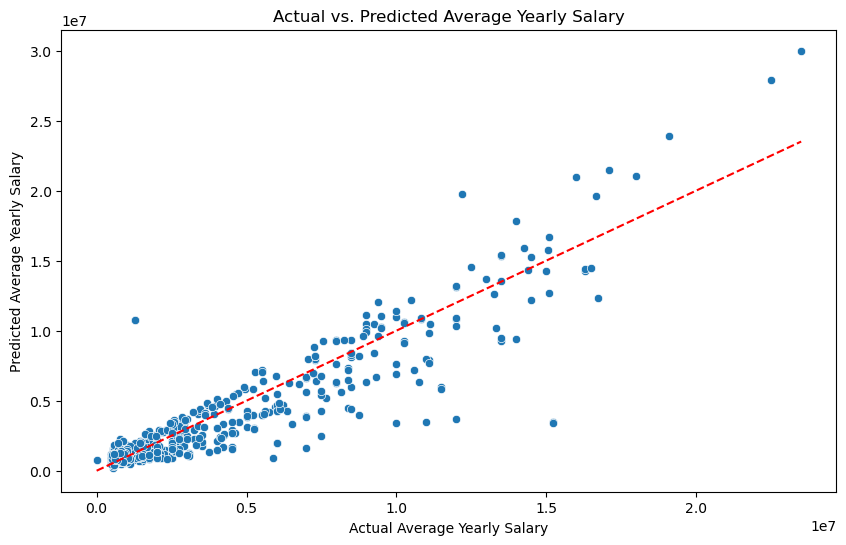

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Create the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plotting the Results

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Average Yearly Salary")
plt.ylabel("Predicted Average Yearly Salary")
plt.title("Actual vs. Predicted Average Yearly Salary")


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


## Experiment 1: Evaluation

In this section, we will evaluate the performance of our linear regression model using the Root Mean Squared Error (RMSE) metric. RMSE measures the average magnitude of the errors between predicted and actual values. It is a useful metric for regression problems, providing insight into how well our model is performing.

The formula for RMSE is:

[ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} ]

Where:

( y_i ) is the actual value,
( \hat{y}_i ) is the predicted value,
( n ) is the number of observations.
We will calculate RMSE using the test dataset and print the result.

The following code snippet demonstrates how to compute and display the RMSE for our linear regression model:

In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 1277632.43


In [10]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np

interaction_features = X[['age', 'total_value', 'total_guaranteed', 'fully_guaranteed']]
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_terms = poly.fit_transform(interaction_features)

X_exp2 = np.hstack((X, interaction_terms))

scaler = StandardScaler()
X_exp2 = scaler.fit_transform(X_exp2)

X_train_exp2, X_test_exp2, y_train_exp2, y_test_exp2 = train_test_split(X_exp2, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_exp2, y_train_exp2)
y_pred_ridge = ridge_model.predict(X_test_exp2)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_exp2, y_train_exp2)
y_pred_rf = rf_model.predict(X_test_exp2)

rmse_ridge = np.sqrt(mean_squared_error(y_test_exp2, y_pred_ridge))
rmse_rf = np.sqrt(mean_squared_error(y_test_exp2, y_pred_rf))

print(f"Ridge Regression RMSE: {rmse_ridge:.2f}")
print(f"Random Forest Regression RMSE: {rmse_rf:.2f}")


Ridge Regression RMSE: 1200816.51
Random Forest Regression RMSE: 613593.80


## Experiment 2: Results and Analysis

In Experiment 2, I explored the effects of modifying the feature set and trying different models (Ridge Regression and Random Forest Regression) to improve the predictive performance compared to Experiment 1, which used simple linear regression. 

    Ridge Regression:

    RMSE: 1,200,816.51

    Compared to Experiment 1's Linear Regression model (RMSE: 1,277,632.43), Ridge Regression achieved a slightly lower RMSE. This suggests that adding regularization helped reduce overfitting to some extent, improving the model’s performance.
Random Forest Regression:

    RMSE: 613,593.80

    The Random Forest model significantly outperformed both Linear Regression and Ridge Regression, achieving the lowest RMSE among the models tested. This indicates that Random Forest captured complex, non-linear relationships in the data that linear models could not, resulting in much more accurate predictions.

    Feature and Model Choice Impact: The inclusion of interaction terms and the choice of a non-linear model like Random Forest made a substantial difference in the prediction accuracy, as evidenced by the reduction in RMSE.
    
    Ridge Regression Performance: Although Ridge Regression introduced regularization, it only provided a modest improvement over Linear Regression. This suggests that linear models may have limitations in capturing the patterns within this dataset.

The Random Forest model with an RMSE of 613,593.80 proved to be the best model for this dataset in Experiment 2. Compared to experiment 1, it reduced the RMSE by over 50%, showing that non-linear approaches are more effective for predicting player salaries in the dataset. 

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

poly = PolynomialFeatures(degree=1, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(X[['age', 'total_value', 'total_guaranteed', 'fully_guaranteed']])


y_log = np.log1p(y)


X_exp3 = np.hstack((X, poly_features))


scaler = StandardScaler()
X_exp3 = scaler.fit_transform(X_exp3)


X_train_exp3, X_test_exp3, y_train_exp3, y_test_exp3 = train_test_split(X_exp3, y_log, test_size=0.2, random_state=42)


gbr_model = GradientBoostingRegressor(random_state=42)


param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200]
}


random_search = RandomizedSearchCV(
    estimator=gbr_model, 
    param_distributions=param_grid, 
    n_iter=5,           
    cv=3,                 
    scoring='neg_mean_squared_error', 
    random_state=42, 
    verbose=1, 
    n_jobs=2            
)
random_search.fit(X_train_exp3, y_train_exp3)


best_gbr = random_search.best_estimator_


y_pred_log = best_gbr.predict(X_test_exp3)
y_pred_exp3 = np.expm1(y_pred_log)  


rmse_exp3 = np.sqrt(mean_squared_error(y_test, y_pred_exp3))
print(f"Gradient Boosting RMSE (Experiment 3): {rmse_exp3:.2f}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Gradient Boosting RMSE (Experiment 3): 796463.10


## Experiment 3 Results and Analysis

In Experiment 3, I aimed to further improve the predictive performance by using a Gradient Boosting model with advanced feature engineering and hyperparameter tuning. This experiment explored more complex interactions and transformations to see if the Gradient Boosting model could outperform the Random Forest model from Experiment 2.

    Gradient Boosting Model:
    
    RMSE: 796,463.10
    
    Analysis: The Gradient Boosting model achieved a lower RMSE than Linear Regression and Ridge Regression in previous experiments but did not surpass the performance of the Random Forest model from Experiment 2. This result suggests that although Gradient Boosting can capture some non-linear patterns, it may be less effective for this dataset’s structure or the specific hyperparameter setup compared to Random Forest.

    With an RMSE of 796,463.10, the Gradient Boosting model underperformed compared to the Random Forest model’s RMSE of 613,593.80 in Experiment 2. This indicates that Random Forest remains the best-performing model for this dataset, capturing complex interactions more effectively with less tuning and feature engineering.


Experiment 3 demonstrated that while Gradient Boosting can handle complex data relationships and benefit from advanced feature engineering, it was not able to surpass Random Forest’s performance on this dataset. Random Forest’s lower RMSE indicates that it better captures the underlying patterns of player salaries, making it the most effective model tested. For further improvements, additional tuning of the Random Forest model or exploring other ensemble methods could be beneficial.

## Impact Section 

This project’s predictive model for player salaries has notable social and ethical implications. By using data-driven insights, it could promote fairer compensation based on performance, potentially reducing subjective biases in contract negotiations. However, it also risks reinforcing pay disparities and undervaluing intangible player contributions like leadership, which are harder to quantify. Ethical concerns around transparency and privacy arise, as players need to understand how these predictions are made, and organizations must protect sensitive data. Additionally, young athletes may focus on certain metrics to secure higher salaries, potentially affecting holistic skill development. Responsible use of this model requires balancing data with human judgment and ensuring fairness and transparency in its applications.

## Conclusion

Through this project, I gained valuable insights into the impact of different modeling techniques, preprocessing steps, and feature engineering on model performance. One of the key lessons was that non-linear models, like Random Forest, excelled in capturing complex interactions in the data, achieving the best performance with an RMSE significantly lower than linear models. This demonstrated the importance of choosing models that align with the data structure.

Preprocessing steps like feature scaling and log transformations were also essential for managing outliers and stabilizing variance, which contributed to improving model accuracy. Including interaction terms and experimenting with polynomial features provided the model with richer inputs, although not all enhancements improved performance equally. Hyperparameter tuning in Gradient Boosting showed that fine-tuning can yield better accuracy, but it also highlighted that some models are more sensitive to hyperparameters than others. Overall, I learned that effective data preparation, selecting the right features, and aligning the model choice with the data characteristics are crucial for achieving accurate predictions.